# Introduction

## Background

This dataset contains the selling price of homes for King County to cover Seattle, USA. This data includes homes sold between May 2014 and May 2015.

## Goals


In this project I will evaluate a regression model to predict house prices based on certain specifications.

## Libraries

I used subset DataSet LendingClub from Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction

Packages : Numpy, Pandas, Matplotlib, Seaborn, Sklearn, Tensorflow-Keras

## Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('ticks')

In [3]:
df = pd.read_csv('kc_house_data.csv')

__Feature Columns__    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Exploratory Data Analysis (EDA)

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

It is good dataset, no missing data!

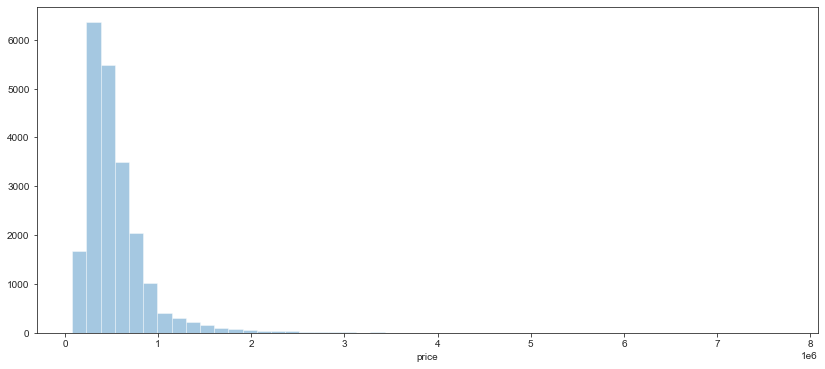

In [5]:
plt.figure(figsize=(14,6))
sns.distplot(df['price'],kde=False, bins=50)

from the plot, we can see most of the price is below 1 million dollar 

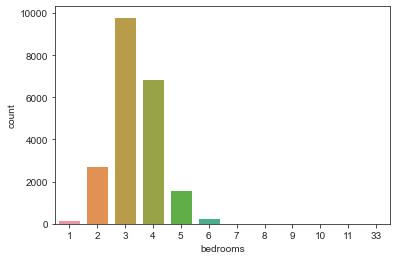

In [6]:
sns.countplot(df['bedrooms'])

most of house have 3 - 4 total bedrooms 

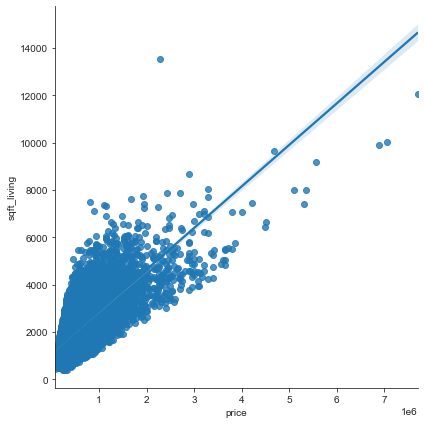

In [7]:
sns.lmplot(x='price',y='sqft_living',data=df, height=6)

from the plot we can see that, most of house is sale below 3 million dollar with 6000 sqft_living

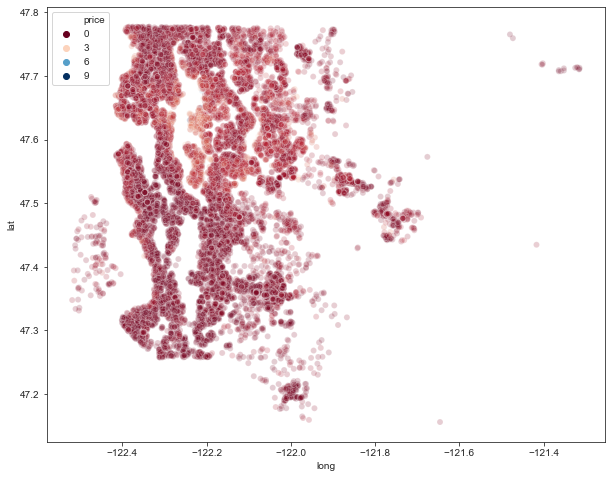

In [8]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price',palette='RdBu',alpha=0.2)

I will try to plot _price_ data against the location based on the _zipcode_, the curve can be matched to the original map to see the data distribution.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

I will try to modify some features to get more useful data, first I look at the data types in the dataframe

id data is useless in this analysis, so i i chose to drop that column

In [10]:
df = df.drop('id',axis=1)

In [11]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

I will modify the data type date so that I can see the price per month and per year

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df['month'] = df['date'].apply(lambda date:date.month)

In [14]:
df['year'] = df['date'].apply(lambda date:date.year)

In [15]:
df = df.drop('date',axis=1)

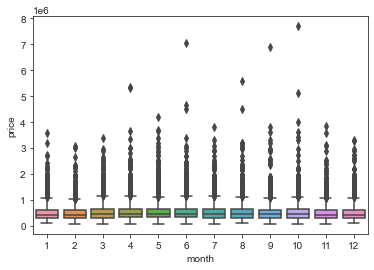

In [16]:
sns.boxplot(x='month',y='price',data=df)

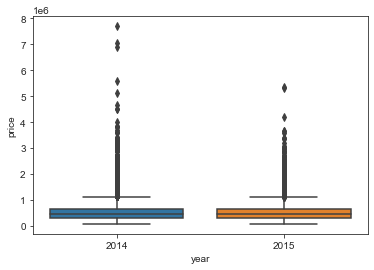

In [17]:
sns.boxplot(x='year',y='price',data=df)

the price are more variance in 2014 compared to 2015

In [18]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


now, i will drop zipcode because it useless for modeling

In [20]:
df = df.drop('zipcode',axis=1)

# Treating Data

## Training Data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [22]:
X = df.drop('price',axis=1)
y = df['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling Data

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam

In [27]:
df.shape

(21597, 20)

In [28]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layer 1
model.add(Dense(19,activation='relu'))

# hidden layer 2
model.add(Dense(19,activation='relu'))

# hidden layer 3
model.add(Dense(19,activation='relu'))

# output layer 
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [29]:
model.fit(x=X_train,y=y_train.values,batch_size=64,epochs=1000,validation_data=(X_test,y_test.values))

Epoch 1/1000
237/237 [==============================] - 1s 3ms/step - loss: 429639860224.0000 - val_loss: 414750015488.0000
Epoch 2/1000
237/237 [==============================] - 0s 2ms/step - loss: 368039755776.0000 - val_loss: 233811066880.0000
Epoch 3/1000
237/237 [==============================] - 0s 2ms/step - loss: 133306900480.0000 - val_loss: 95431524352.0000
Epoch 4/1000
237/237 [==============================] - 0s 2ms/step - loss: 97247977472.0000 - val_loss: 92347645952.0000
Epoch 5/1000
237/237 [==============================] - 0s 2ms/step - loss: 94007328768.0000 - val_loss: 89250045952.0000
Epoch 6/1000
237/237 [==============================] - 0s 2ms/step - loss: 90576158720.0000 - val_loss: 85946671104.0000
Epoch 7/1000
237/237 [==============================] - 0s 2ms/step - loss: 87044456448.0000 - val_loss: 82340020224.0000
Epoch 8/1000
237/237 [==============================] - 0s 2ms/step - loss: 83269337088.0000 - val_loss: 78665752576.0000
Epoch 9/1000
237/23

237/237 [==============================] - 0s 2ms/step - loss: 31526821888.0000 - val_loss: 29708384256.0000
Epoch 134/1000
237/237 [==============================] - 0s 2ms/step - loss: 31475593216.0000 - val_loss: 29722046464.0000
Epoch 135/1000
237/237 [==============================] - 0s 2ms/step - loss: 31477975040.0000 - val_loss: 29665785856.0000
Epoch 136/1000
237/237 [==============================] - 0s 2ms/step - loss: 31482073088.0000 - val_loss: 29691525120.0000
Epoch 137/1000
237/237 [==============================] - 0s 2ms/step - loss: 31422525440.0000 - val_loss: 29601781760.0000
Epoch 138/1000
237/237 [==============================] - 0s 2ms/step - loss: 31389607936.0000 - val_loss: 29547943936.0000
Epoch 139/1000
237/237 [==============================] - 0s 2ms/step - loss: 31347836928.0000 - val_loss: 29534859264.0000
Epoch 140/1000
237/237 [==============================] - 0s 2ms/step - loss: 31347173376.0000 - val_loss: 29525831680.0000
Epoch 141/1000
237/237 

237/237 [==============================] - 0s 2ms/step - loss: 29210648576.0000 - val_loss: 26899812352.0000
Epoch 266/1000
237/237 [==============================] - 0s 2ms/step - loss: 29196937216.0000 - val_loss: 26745790464.0000
Epoch 267/1000
237/237 [==============================] - 0s 2ms/step - loss: 29205774336.0000 - val_loss: 26840633344.0000
Epoch 268/1000
237/237 [==============================] - 0s 2ms/step - loss: 29166864384.0000 - val_loss: 26691463168.0000
Epoch 269/1000
237/237 [==============================] - 0s 2ms/step - loss: 29160003584.0000 - val_loss: 26724235264.0000
Epoch 270/1000
237/237 [==============================] - 0s 2ms/step - loss: 29195302912.0000 - val_loss: 26735278080.0000
Epoch 271/1000
237/237 [==============================] - 0s 2ms/step - loss: 29214115840.0000 - val_loss: 26682890240.0000
Epoch 272/1000
237/237 [==============================] - 0s 2ms/step - loss: 29123852288.0000 - val_loss: 26622339072.0000
Epoch 273/1000
237/237 

237/237 [==============================] - 0s 2ms/step - loss: 27985035264.0000 - val_loss: 25312675840.0000
Epoch 398/1000
237/237 [==============================] - 0s 2ms/step - loss: 27909416960.0000 - val_loss: 25375559680.0000
Epoch 399/1000
237/237 [==============================] - 0s 2ms/step - loss: 27869097984.0000 - val_loss: 25412495360.0000
Epoch 400/1000
237/237 [==============================] - 0s 2ms/step - loss: 27974363136.0000 - val_loss: 25282914304.0000
Epoch 401/1000
237/237 [==============================] - 0s 2ms/step - loss: 27906254848.0000 - val_loss: 25278832640.0000
Epoch 402/1000
237/237 [==============================] - 0s 2ms/step - loss: 27887728640.0000 - val_loss: 25336244224.0000
Epoch 403/1000
237/237 [==============================] - 0s 2ms/step - loss: 27868833792.0000 - val_loss: 25319579648.0000
Epoch 404/1000
237/237 [==============================] - 0s 2ms/step - loss: 27936665600.0000 - val_loss: 25291087872.0000
Epoch 405/1000
237/237 

237/237 [==============================] - 0s 2ms/step - loss: 27205275648.0000 - val_loss: 24795578368.0000
Epoch 530/1000
237/237 [==============================] - 0s 2ms/step - loss: 27223115776.0000 - val_loss: 24816730112.0000
Epoch 531/1000
237/237 [==============================] - 0s 2ms/step - loss: 27243196416.0000 - val_loss: 25071835136.0000
Epoch 532/1000
237/237 [==============================] - 0s 2ms/step - loss: 27187345408.0000 - val_loss: 24833814528.0000
Epoch 533/1000
237/237 [==============================] - 0s 2ms/step - loss: 27224330240.0000 - val_loss: 24839661568.0000
Epoch 534/1000
237/237 [==============================] - 1s 2ms/step - loss: 27235028992.0000 - val_loss: 24812122112.0000
Epoch 535/1000
237/237 [==============================] - 1s 2ms/step - loss: 27198236672.0000 - val_loss: 24853430272.0000
Epoch 536/1000
237/237 [==============================] - 1s 2ms/step - loss: 27201273856.0000 - val_loss: 24951486464.0000
Epoch 537/1000
237/237 

237/237 [==============================] - 0s 2ms/step - loss: 26837780480.0000 - val_loss: 24756758528.0000
Epoch 662/1000
237/237 [==============================] - 0s 2ms/step - loss: 26849165312.0000 - val_loss: 24585248768.0000
Epoch 663/1000
237/237 [==============================] - 0s 2ms/step - loss: 26818144256.0000 - val_loss: 24522887168.0000
Epoch 664/1000
237/237 [==============================] - 0s 2ms/step - loss: 26876592128.0000 - val_loss: 24579592192.0000
Epoch 665/1000
237/237 [==============================] - 0s 2ms/step - loss: 26857662464.0000 - val_loss: 24637388800.0000
Epoch 666/1000
237/237 [==============================] - 0s 2ms/step - loss: 26856792064.0000 - val_loss: 24532029440.0000
Epoch 667/1000
237/237 [==============================] - 0s 2ms/step - loss: 26842068992.0000 - val_loss: 24768901120.0000
Epoch 668/1000
237/237 [==============================] - 0s 2ms/step - loss: 26812536832.0000 - val_loss: 24513220608.0000
Epoch 669/1000
237/237 

237/237 [==============================] - 0s 2ms/step - loss: 26649202688.0000 - val_loss: 24380409856.0000
Epoch 794/1000
237/237 [==============================] - 0s 2ms/step - loss: 26704232448.0000 - val_loss: 24427296768.0000
Epoch 795/1000
237/237 [==============================] - 0s 2ms/step - loss: 26644148224.0000 - val_loss: 24456904704.0000
Epoch 796/1000
237/237 [==============================] - 0s 2ms/step - loss: 26650009600.0000 - val_loss: 24351803392.0000
Epoch 797/1000
237/237 [==============================] - 0s 2ms/step - loss: 26677028864.0000 - val_loss: 24348411904.0000
Epoch 798/1000
237/237 [==============================] - 0s 2ms/step - loss: 26600833024.0000 - val_loss: 24363313152.0000
Epoch 799/1000
237/237 [==============================] - 0s 2ms/step - loss: 26694604800.0000 - val_loss: 24404002816.0000
Epoch 800/1000
237/237 [==============================] - 0s 2ms/step - loss: 26641326080.0000 - val_loss: 24347500544.0000
Epoch 801/1000
237/237 

237/237 [==============================] - 0s 2ms/step - loss: 26567419904.0000 - val_loss: 24258254848.0000
Epoch 926/1000
237/237 [==============================] - 0s 2ms/step - loss: 26453311488.0000 - val_loss: 24162953216.0000
Epoch 927/1000
237/237 [==============================] - 0s 2ms/step - loss: 26458773504.0000 - val_loss: 24407818240.0000
Epoch 928/1000
237/237 [==============================] - 0s 2ms/step - loss: 26478868480.0000 - val_loss: 24305195008.0000
Epoch 929/1000
237/237 [==============================] - 0s 2ms/step - loss: 26501644288.0000 - val_loss: 24311431168.0000
Epoch 930/1000
237/237 [==============================] - 0s 2ms/step - loss: 26494177280.0000 - val_loss: 24353640448.0000
Epoch 931/1000
237/237 [==============================] - 0s 2ms/step - loss: 26481278976.0000 - val_loss: 24269402112.0000
Epoch 932/1000
237/237 [==============================] - 0s 2ms/step - loss: 26529841152.0000 - val_loss: 24223838208.0000
Epoch 933/1000
237/237 

In [30]:
losses = pd.DataFrame(model.history.history)

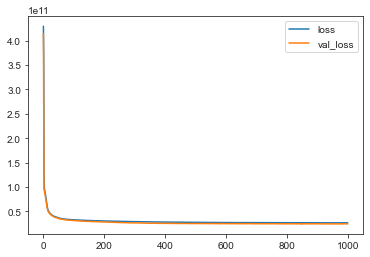

In [31]:
losses.plot()

the model curve shows the tangent of the loss and val_loss where the curve starts to overfitting, therefore I will try to use this model.

## Evaluating Data

In [32]:
predictions = model.predict(X_test)

In [33]:
mean_absolute_error(y_test,predictions)

98760.63809558256

In [34]:
np.sqrt(mean_squared_error(y_test,predictions))

155640.21851781858

In [35]:
df['price'].mean()

540296.5735055795

I tried to calculate the variant score, the error value is almost 20% compared to the average price

In [36]:
explained_variance_score(y_test,predictions)

0.8177279189207047

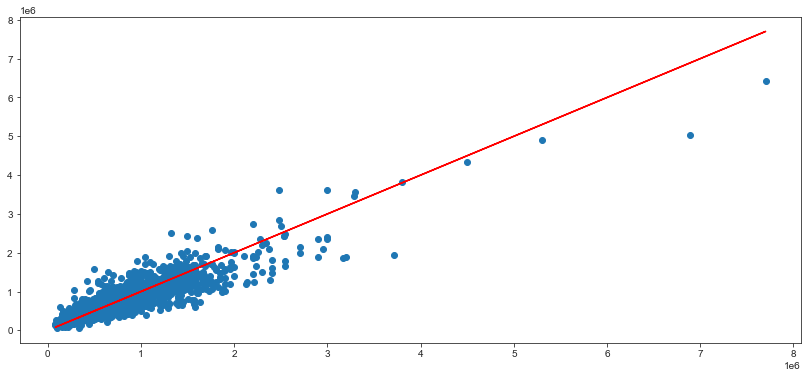

In [37]:
plt.figure(figsize=(14,6))

plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r') #My Perfect Predict

From the curve you can see that the model I made will predict better on a house with a price below 2 million dollars

In [38]:
errors = y_test.values.reshape(6480, 1) - predictions

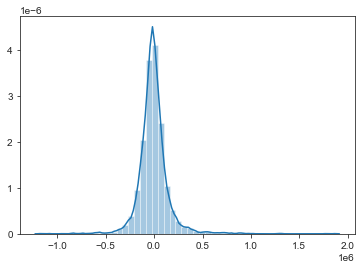

In [39]:
sns.distplot(errors)

# Testing Model

In [40]:
import random
random.seed(2000)
random_ind = random.randint(0,len(df))

single_house = df.drop('price',axis=1).iloc[random_ind]
single_house = scaler.transform(single_house.values.reshape(-1, 19))

model.predict(single_house)

array([[387413.53]], dtype=float32)

I tested using random data, it  is about 10% of the total data

In [41]:
df.iloc[random_ind]['price']

383000.0

The house price predicted by random data was 387,413 dollars, while the actual data for the house price was 383,000 dollars.